# RNA-seq Cell-Line Project
## Transposable Elements Expression

### Setting up

**Calling the necessary libraries:**

In [1]:
suppressMessages(suppressWarnings(library(readr)))
suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(tidyr)))
suppressMessages(suppressWarnings(library(tibble)))
suppressMessages(suppressWarnings(library(pheatmap)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(forcats)))
suppressMessages(suppressWarnings(library(stringr)))
suppressMessages(suppressWarnings(library(RColorBrewer)))
suppressMessages(suppressWarnings(library(gridExtra)))
#suppressMessages(suppressWarnings(library(viridis)))
#suppressMessages(suppressWarnings(library(rtracklayer)))

**Calling the files:**

In [3]:
### FeatureCounts output 
fc_counts <- "/home5/attilio/Laura/Cell_line_project/Cell_line_RNAseq/teste_te/teste_te.txt"

## Feature lenght
featlen_file <- "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/resources/rna-seq/paired_snakePipes/feature_lengths.tsv"

**Preparing the files:**

In [5]:
fc <- read_tsv(fc_counts, skip = 1) %>% select(c(1,7)) %>% suppressMessages
fc$Geneid <- sapply(fc$Geneid, function(x) str_split(x, "::")[[1]][1])

names(fc) <- c("geneid", "counts")
head(fc)

geneid,counts
<chr>,<dbl>
rnd-1_family-27,2
rnd-6_family-1263,0
rnd-5_family-2165,10
(TTTTC)n,6
rnd-5_family-2165,2
rnd-3_family-27,103


In [6]:
# verified with mapping_statistics.py 

total_mapped_reads = 23941961

In [7]:
featlen <- read_tsv(featlen_file, col_names = c("geneid", "len","cl", "fam")) %>% suppressMessages
featlen %>% head

geneid,len,cl,fam
<chr>,<dbl>,<chr>,<chr>
RPRC000679-RA,327,transcript,transcript
RPRC003242-RA,1211,transcript,transcript
RPRC003262-RA,1497,transcript,transcript
RPRC003241-RA,843,transcript,transcript
RPRC003252-RA,1179,transcript,transcript
RPRC003249-RA,1060,transcript,transcript


In [8]:
fc_lengths <- left_join(fc, featlen , by = "geneid")
fc_lengths %>% head

geneid,counts,len,cl,fam
<chr>,<dbl>,<dbl>,<chr>,<chr>
rnd-1_family-27,2,445,Unknown,Unknown
rnd-6_family-1263,0,NA,NA,NA
rnd-5_family-2165,10,1289,LINE,RTE-RTE
(TTTTC)n,6,NA,NA,NA
rnd-5_family-2165,2,1289,LINE,RTE-RTE
rnd-3_family-27,103,124,LINE,LINE


In [19]:
teste_fpkm <- fc_lengths %>% 
    rowwise %>% 
    mutate(fpkm = (counts * 1000000) / ( (len/1000) * total_mapped_reads))

teste_fpkm %>% head

geneid,counts,len,cl,fam,fpkm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
rnd-1_family-27,2,445,Unknown,Unknown,0.18771988
rnd-6_family-1263,0,NA,NA,NA,NA
rnd-5_family-2165,10,1289,LINE,RTE-RTE,0.32403160
(TTTTC)n,6,NA,NA,NA,NA
rnd-5_family-2165,2,1289,LINE,RTE-RTE,0.06480632
rnd-3_family-27,103,124,LINE,LINE,34.69411554


In [20]:
te_fpkm <- teste_fpkm %>% 
    rowwise %>% 
    mutate(clfam=str_c(cl, "/", fam))

te_fpkm %>% head

geneid,counts,len,cl,fam,fpkm,clfam
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
rnd-1_family-27,2,445,Unknown,Unknown,0.18771988,Unknown/Unknown
rnd-6_family-1263,0,NA,NA,NA,NA,NA
rnd-5_family-2165,10,1289,LINE,RTE-RTE,0.32403160,LINE/RTE-RTE
(TTTTC)n,6,NA,NA,NA,NA,NA
rnd-5_family-2165,2,1289,LINE,RTE-RTE,0.06480632,LINE/RTE-RTE
rnd-3_family-27,103,124,LINE,LINE,34.69411554,LINE/LINE


In [21]:
te_fpkm_premat <- te_fpkm %>% 
    group_by(fam) %>% 
    summarise(fpkmsum=sum(fpkm)) %>% 
    rowwise %>% 
    mutate(fpkmlog = log10(fpkmsum + 1))

te_fpkm_premat <- te_fpkm_premat[order(-te_fpkm_premat$fpkmlog), ]
te_fpkm_premat  <- te_fpkm_premat  %>% filter(fam != "NA")

te_fpkm_premat

fam,fpkmsum,fpkmlog
<chr>,<dbl>,<dbl>
Unknown,893746.12850,5.951215
TcMar-Mariner,112905.91164,5.052721
I-Jockey,89740.52464,4.952993
TcMar-Tc1,80399.22431,4.905257
Helitron,73654.82300,4.867207
R1-LOA,65688.08871,4.817493
I,41143.12917,4.614308
RTE-BovB,39223.35985,4.593556
RTE-X,35165.59891,4.546130


In [13]:
# write_tsv(x = te_fpkm_premat , file = "./te_fpkm.tsv")

In [33]:
te_fpkm_premat <- te_fpkm_premat %>%
    select(fam, fpkmlog) %>%
    column_to_rownames("fam")
te_fpkm_premat %>% head

,fpkmlog
,<dbl>
Unknown,5.951215
TcMar-Mariner,5.052721
I-Jockey,4.952993
TcMar-Tc1,4.905257
Helitron,4.867207
R1-LOA,4.817493


**Getting embryo information**

In [17]:
tarcisio_fpkm <- read_tsv("/home5/attilio/Tarcisio/smallrna_rhodnius_2023/reports/tables/fpkm.tsv")  %>% suppressMessages
tarcisio_fpkm %>% head

geneid,sample,counts,total,len,cl,fam,fpkm,rpm
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
RPRC000679-RA,PVS1,827.00,35767404,327,transcript,transcript,70.708290,827.00
RPRC000679-RA,PVS2,403.17,23340115,327,transcript,transcript,52.824752,403.17
RPRC000679-RA,Egg1,201.00,26268998,327,transcript,transcript,23.399404,201.00
RPRC000679-RA,Egg2,143.00,21101288,327,transcript,transcript,20.724274,143.00
RPRC000679-RA,Emb1_0h,20.00,10554397,327,transcript,transcript,5.794938,20.00
RPRC000679-RA,Nym1,74.00,13525392,327,transcript,transcript,16.731470,74.00


In [29]:
testando <- tarcisio_fpkm %>% 
    filter(str_detect(sample, "^Emb|^emb")) %>% 
    filter(! str_detect(geneid, "^RPR")) 

testando %>% head

geneid,sample,counts,total,len,cl,fam,fpkm,rpm
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
rnd-1_family-27,Emb1_0h,0,10554397,445,Unknown,Unknown,0,0
rnd-5_family-2165,Emb1_0h,0,10554397,1289,LINE,RTE-RTE,0,0
rnd-5_family-2165_dup1,Emb1_0h,0,10554397,697,LINE,RTE-RTE,0,0
rnd-3_family-27,Emb1_0h,0,10554397,124,LINE,LINE,0,0
rnd-6_family-4962,Emb1_0h,0,10554397,171,LINE,RTE-BovB,0,0
rnd-1_family-344,Emb1_0h,0,10554397,324,LINE,RTE-BovB,0,0


In [30]:
testando_te_fpkm_premat <- testando  %>% 
    group_by(sample,fam) %>% 
    summarise(fpkmsum=sum(fpkm)) %>% 
    rowwise %>% 
    mutate(fpkmlog = log10(fpkmsum + 1))

testando_te_fpkm_premat %>% head

`summarise()` has grouped output by 'sample'. You can override using the `.groups` argument.


sample,fam,fpkmsum,fpkmlog
<chr>,<chr>,<dbl>,<dbl>
Emb1_0h,CMC-Chapaev-3,4.492710e-01,0.161149589
Emb1_0h,CR1,9.479821e-03,0.004097642
Emb1_0h,Copia,1.248937e+02,2.100003855
Emb1_0h,Crypton-H,0.000000e+00,0.000000000
Emb1_0h,Crypton-I,6.700654e-02,0.028167080
Emb1_0h,DNA,0.000000e+00,0.000000000


In [31]:
testando <- testando_te_fpkm_premat %>% 
    ungroup %>% 
    select(sample, fam, fpkmlog) %>%
    pivot_wider(names_from = sample, values_from=fpkmlog)  %>% 
    column_to_rownames("fam")

testando  %>% head

,Emb1_0h,emb1_0-6,emb1_6-12,emb2_6-12,emb_12h,emb_24h,emb_48h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CMC-Chapaev-3,0.161149589,0.1416501,0.3858548,0.07215459,0.016649364,0.002301889,0.1775116
CR1,0.004097642,1.2420996,1.4646557,1.42104224,0.044509504,0.129717154,0.3571399
Copia,2.100003855,2.5173934,2.3489403,2.37858448,2.445890385,2.344250174,2.3430664
Crypton-H,0.000000000,1.8121490,1.9028736,1.97480535,0.000000000,0.000000000,0.0000000
Crypton-I,0.028167080,0.9485412,1.1690176,1.24966273,0.105677137,0.124677277,0.3097314
DNA,0.000000000,0.9008326,1.1566545,1.14754805,0.006549792,0.019019285,0.0000000


In [32]:
testando <- testando %>% 
    select(Emb1_0h, emb_12h, emb_24h, emb_48h)
colnames(testando )[colnames(testando ) == "emb_12h"] <- "Emb_12h"
colnames(testando )[colnames(testando ) == "emb_24h"] <- "Emb_24h"
colnames(testando )[colnames(testando ) == "emb_48h"] <- "Emb_48h"
testando  %>% head

,Emb1_0h,Emb_12h,Emb_24h,Emb_48h
,<dbl>,<dbl>,<dbl>,<dbl>
CMC-Chapaev-3,0.161149589,0.016649364,0.002301889,0.1775116
CR1,0.004097642,0.044509504,0.129717154,0.3571399
Copia,2.100003855,2.445890385,2.344250174,2.3430664
Crypton-H,0.000000000,0.000000000,0.000000000,0.0000000
Crypton-I,0.028167080,0.105677137,0.124677277,0.3097314
DNA,0.000000000,0.006549792,0.019019285,0.0000000


### Cell-line + Embryos

In [34]:
resultado <- merge(te_fpkm_premat, testando, by = "row.names", all.x = TRUE)

rownames(resultado) <- resultado$Row.names
resultado <- resultado[, -1]
colnames(resultado)[colnames(resultado) == "fpkmlog"] <- "Cell_line"
resultado <- resultado[order(-resultado$Cell_line), ]
resultado

,Cell_line,Emb1_0h,Emb_12h,Emb_24h,Emb_48h
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Unknown,5.951215,4.071929945,3.935254649,3.938380533,3.97594746
TcMar-Mariner,5.052721,3.092960327,2.071163123,1.975522652,2.32841101
I-Jockey,4.952993,2.362354076,2.230643890,2.071376614,2.09952031
TcMar-Tc1,4.905257,1.610711301,2.236640371,2.071001961,2.25617940
Helitron,4.867207,2.038176075,1.926386959,1.765802263,1.92919648
R1-LOA,4.817493,1.574232122,1.698397575,1.345952798,1.93518178
I,4.614308,1.372765384,0.491760823,0.912527098,1.72050321
RTE-BovB,4.593556,2.308918602,1.788807980,1.875775622,2.13350152
RTE-X,4.546130,1.501380617,1.171404885,1.132587715,1.48556112


In [36]:
write_tsv(x = resultado , file = "./all_te_fpkm.tsv")

### Plotting Expression Heatmap

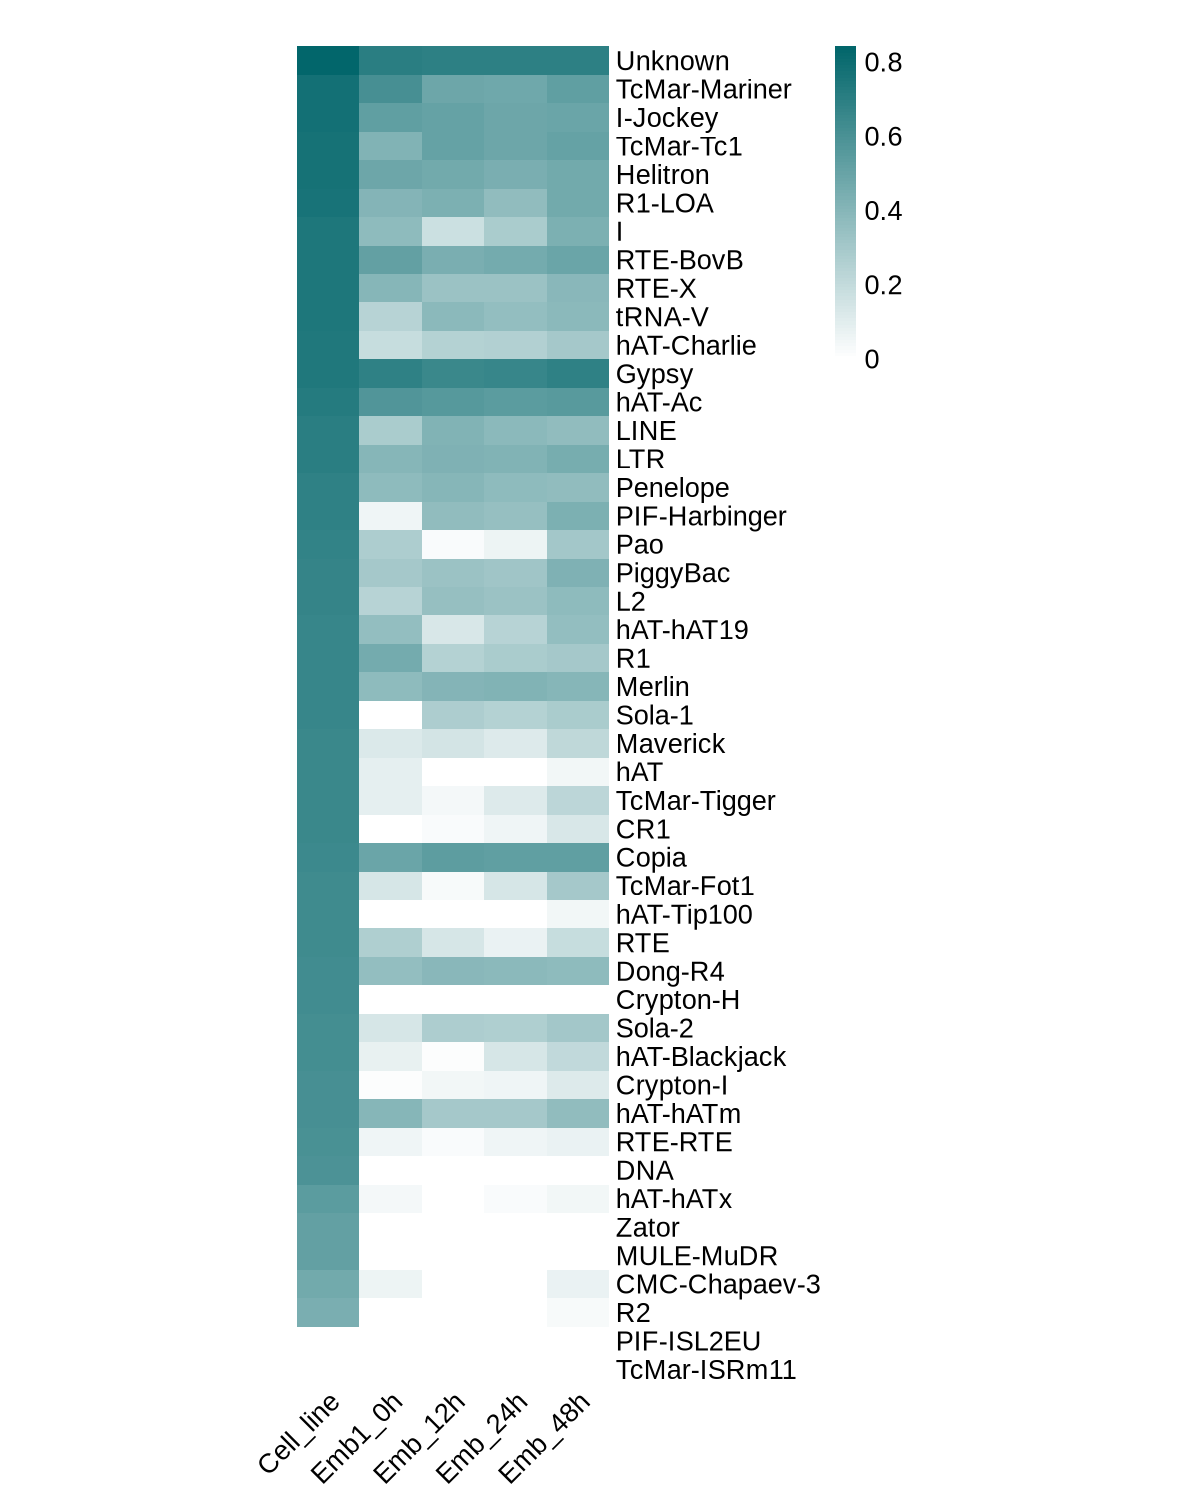

In [35]:
options(repr.plot.width = 8, repr.plot.height = 10, repr.plot.res = 150)

pheatmap(resultado %>% {log10(. + 1)},
         main = "",
         show_rownames = TRUE,
         cluster_cols = FALSE,
         cluster_rows = FALSE,
         fontsize = 13,
         cellwidth = 30,
         border_color = NA,
         color = colorRampPalette(c("white", "#02666b"))(100),
         angle_col = 45)